# Traitement des valeurs incomplètes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Données trafic aérien - France

In [2]:
# import et visualisalisation de la table
df_air_traffic_france = pd.read_csv('france_air_traffic_210712.csv')
df_air_traffic_france['sheduled_time_start'] = pd.to_datetime(df_air_traffic_france['sheduled_time_start'])
df_air_traffic_france.head(5)

,country_origin,citydest,sheduled_time_start,seats,number_planes
0,Albania,Nantes,2021-10-12,189.0,1
1,Albania,Paris,2017-08-17,189.0,1
2,Albania,Paris,2017-08-19,189.0,1
3,Albania,Paris,2017-08-22,189.0,1
4,Albania,Paris,2020-08-12,148.0,1


In [3]:
#tri de la base par ordre croissant des dates
df_air_traffic_france.sort_values(by=['sheduled_time_start'], inplace=True)
df_air_traffic_france.reset_index(drop=True, inplace=True)
df_air_traffic_france.head(5)

,country_origin,citydest,sheduled_time_start,seats,number_planes
0,Brazil,Paris,2017-05-16,451.0,1
1,India,Paris,2017-05-16,381.0,1
2,Portugal,Paris,2017-05-16,134.0,1
3,Russia,Paris,2017-05-16,268.0,2
4,United States-CA,Paris,2017-05-16,400.0,1


### Visualisation de la série temporelle du nombre d'avions par jour

In [4]:
#on regroupe par date
df_air_traffic_date = df_air_traffic_france.groupby('sheduled_time_start').sum()
df_air_traffic_date.reset_index(inplace=True)

Text(0, 0.5, 'Number of planes')

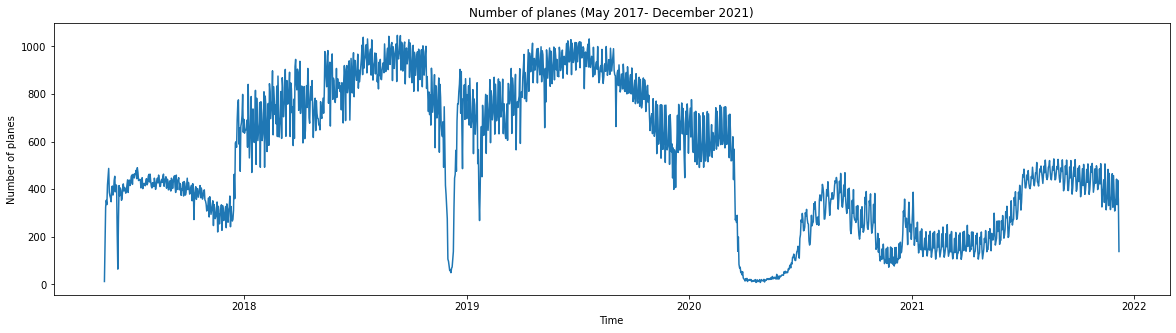

In [5]:
#on trace le nombre d'avions par jour
x = df_air_traffic_date["sheduled_time_start"]
y = df_air_traffic_date["number_planes"]
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y)
plt.title('Number of planes (May 2017- December 2021)')
plt.xlabel('Time')
plt.ylabel('Number of planes')

### Recherche des valeurs manquantes

In [6]:
#pas de NA
df_air_traffic_france[df_air_traffic_france.isna().any(axis=1)]

,country_origin,citydest,sheduled_time_start,seats,number_planes


In [4]:
#Nouvelle variable avec que l'année ou que le mois
df_air_traffic_france['Year'] = df_air_traffic_france['sheduled_time_start'].dt.year 
df_air_traffic_france['Month'] = df_air_traffic_france['sheduled_time_start'].dt.month 
df_air_traffic_france['Day'] = df_air_traffic_france['sheduled_time_start'].dt.day 
df_air_traffic_france

,country_origin,citydest,sheduled_time_start,seats,number_planes,Year,Month,Day
0,Brazil,Paris,2017-05-16,451.0,1,2017,5,16
1,India,Paris,2017-05-16,381.0,1,2017,5,16
2,Portugal,Paris,2017-05-16,134.0,1,2017,5,16
3,Russia,Paris,2017-05-16,268.0,2,2017,5,16
4,United States-CA,Paris,2017-05-16,400.0,1,2017,5,16
...,...,...,...,...,...,...,...,...
265686,United States-IN,Paris,2021-12-07,400.0,1,2021,12,7
265687,France,Bordeaux,2021-12-07,136.0,2,2021,12,7
265688,Austria,Paris,2021-12-07,164.0,1,2021,12,7
265689,United Kingdom,Bordeaux,2021-12-07,189.0,1,2021,12,7


In [5]:
#Nouvelle variable année-mois
df_air_traffic_france['Year-Month'] = df_air_traffic_france['sheduled_time_start'].dt.strftime('%Y-%m')
df_air_traffic_france

,country_origin,citydest,sheduled_time_start,seats,number_planes,Year,Month,Day,Year-Month
0,Brazil,Paris,2017-05-16,451.0,1,2017,5,16,2017-05
1,India,Paris,2017-05-16,381.0,1,2017,5,16,2017-05
2,Portugal,Paris,2017-05-16,134.0,1,2017,5,16,2017-05
3,Russia,Paris,2017-05-16,268.0,2,2017,5,16,2017-05
4,United States-CA,Paris,2017-05-16,400.0,1,2017,5,16,2017-05
...,...,...,...,...,...,...,...,...,...
265686,United States-IN,Paris,2021-12-07,400.0,1,2021,12,7,2021-12
265687,France,Bordeaux,2021-12-07,136.0,2,2021,12,7,2021-12
265688,Austria,Paris,2021-12-07,164.0,1,2021,12,7,2021-12
265689,United Kingdom,Bordeaux,2021-12-07,189.0,1,2021,12,7,2021-12


Text(0, 0.5, 'Date')

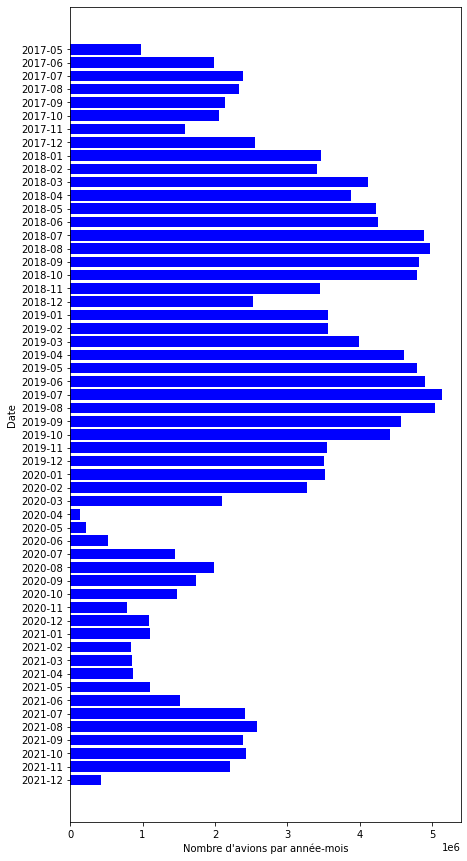

In [9]:
#On regarde le nombre de sièges par année-mois
df_air_traffic_annee_mois = df_air_traffic_france.groupby('Year-Month').agg({'seats': "sum"}).sort_values('Year-Month', ascending=False)
df_air_traffic_annee_mois.reset_index(inplace=True)

fig = plt.figure(1, figsize=(7, 15))
plt.barh(df_air_traffic_annee_mois['Year-Month'], df_air_traffic_annee_mois['seats'], color="blue")
plt.xlabel("Nombre d'avions par année-mois")
plt.ylabel('Date')

#très faible en avril/mai/juin 2020 : normal confinement covid
#2017 : faible --> corriger ?
#décembre 2018 : faible --> corriger ?

### Les problèmes de Novembre et Décembre 2018 :

Text(0, 0.5, 'Nombre de sièges par jour en décembre 2018')

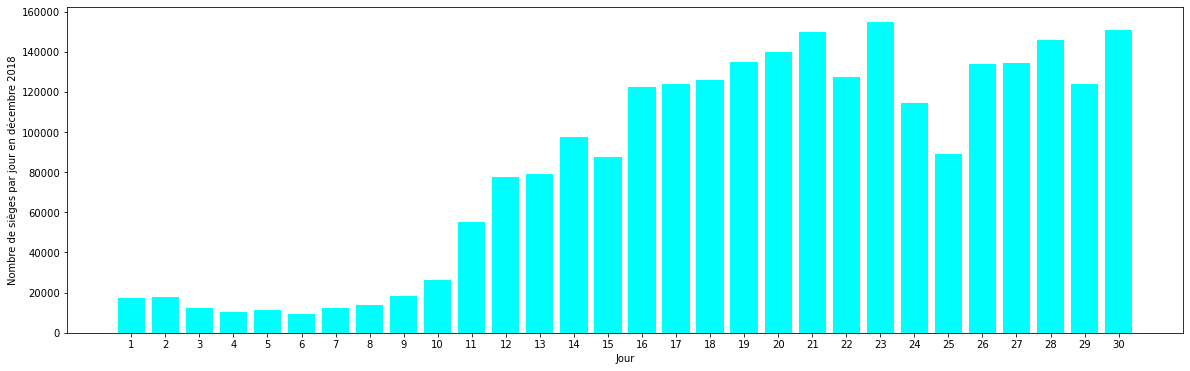

In [6]:
df_air_traffic_dec2018 = df_air_traffic_france[df_air_traffic_france['Year-Month'] == "2018-12"]
df_sieges_jour_dec2018 = df_air_traffic_dec2018.groupby('Day').agg({'seats': "sum"})
df_sieges_jour_dec2018.reset_index(inplace=True)
df_sieges_jour_dec2018['Day'] = df_sieges_jour_dec2018['Day'].astype(str)

fig = plt.figure(1, figsize=(20,6))
plt.bar(df_sieges_jour_dec2018['Day'], df_sieges_jour_dec2018['seats'], color="cyan")
plt.xlabel('Jour')
plt.ylabel("Nombre de sièges par jour en décembre 2018")

# y a un pb jusqu'au 10 décembre : trop peu d'avions

#pourquoi y a pas le 31 décembre ??

Text(0, 0.5, 'Nombre de sièges par jour en novembre 2018')

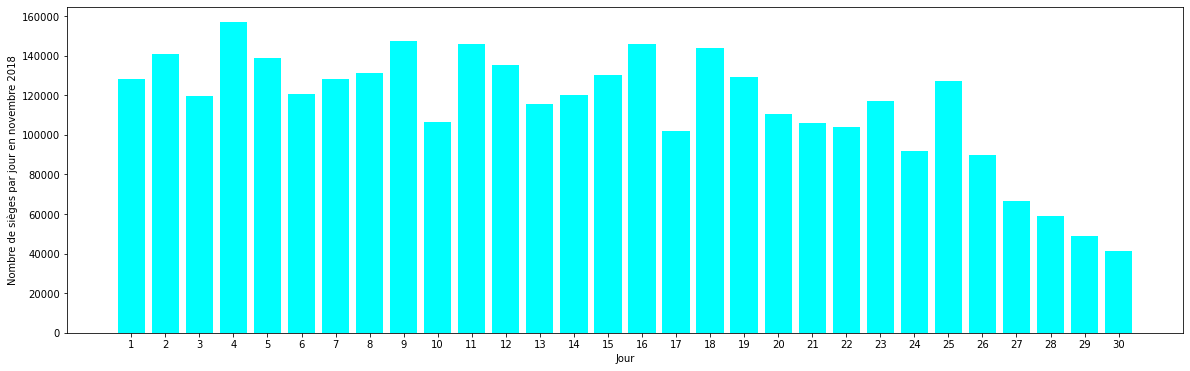

In [7]:
df_air_traffic_nov2018 = df_air_traffic_france[df_air_traffic_france['Year-Month'] == "2018-11"]
df_sieges_jour_nov2018 = df_air_traffic_nov2018.groupby('Day').agg({'seats': "sum"})
df_sieges_jour_nov2018.reset_index(inplace=True)
df_sieges_jour_nov2018['Day'] = df_sieges_jour_nov2018['Day'].astype(str)

fig = plt.figure(1, figsize=(20,6))
plt.bar(df_sieges_jour_nov2018['Day'], df_sieges_jour_nov2018['seats'], color="cyan")
plt.xlabel('Jour')
plt.ylabel("Nombre de sièges par jour en novembre 2018")

#ça diminue bcp vers le 24 novembre

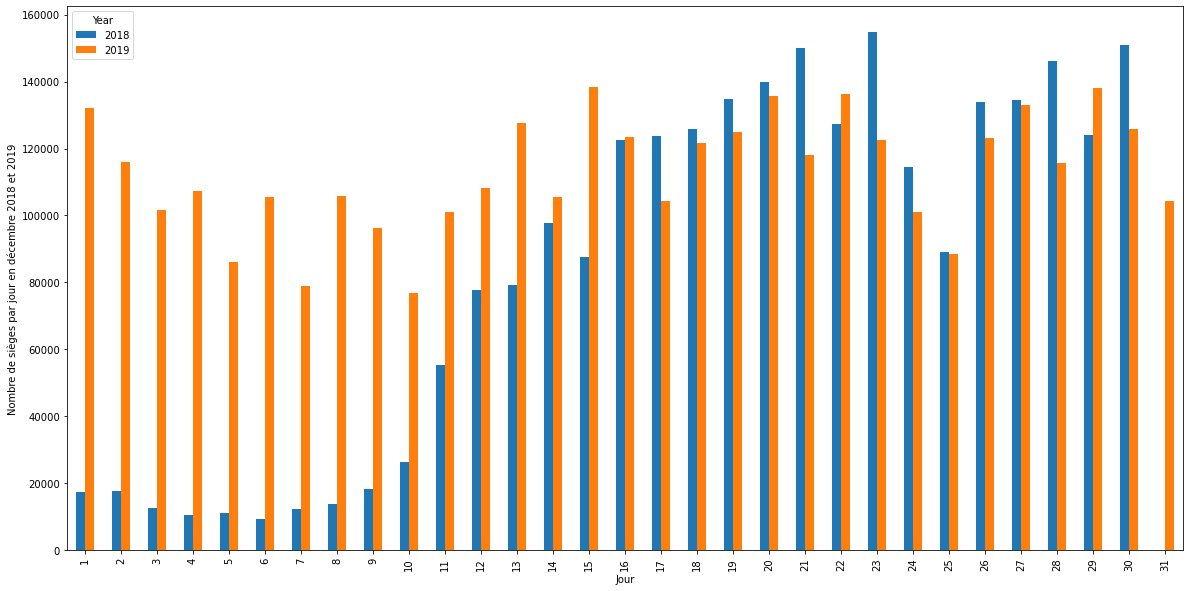

In [8]:
#Comparaison décembre 2018 et décembre 2019
df_air_traffic_en_dec = df_air_traffic_france[df_air_traffic_france['Year-Month'].isin(["2018-12", "2019-12"])]

df_sieges_jour_en_dec = df_air_traffic_en_dec.pivot_table(columns="Year", values="seats", index=["Day"], aggfunc='sum')
df_sieges_jour_en_dec.reset_index(inplace=True)
df_sieges_jour_en_dec['Day'] = df_sieges_jour_en_dec['Day'].astype(str)

df_sieges_jour_en_dec.plot(x="Day", y=[2018, 2019], kind="bar",figsize=(20,10))
plt.xlabel('Jour')
plt.ylabel("Nombre de sièges par jour en décembre 2018 et 2019")

plt.show()

#jusqu'au 15 décembre il y a une différence

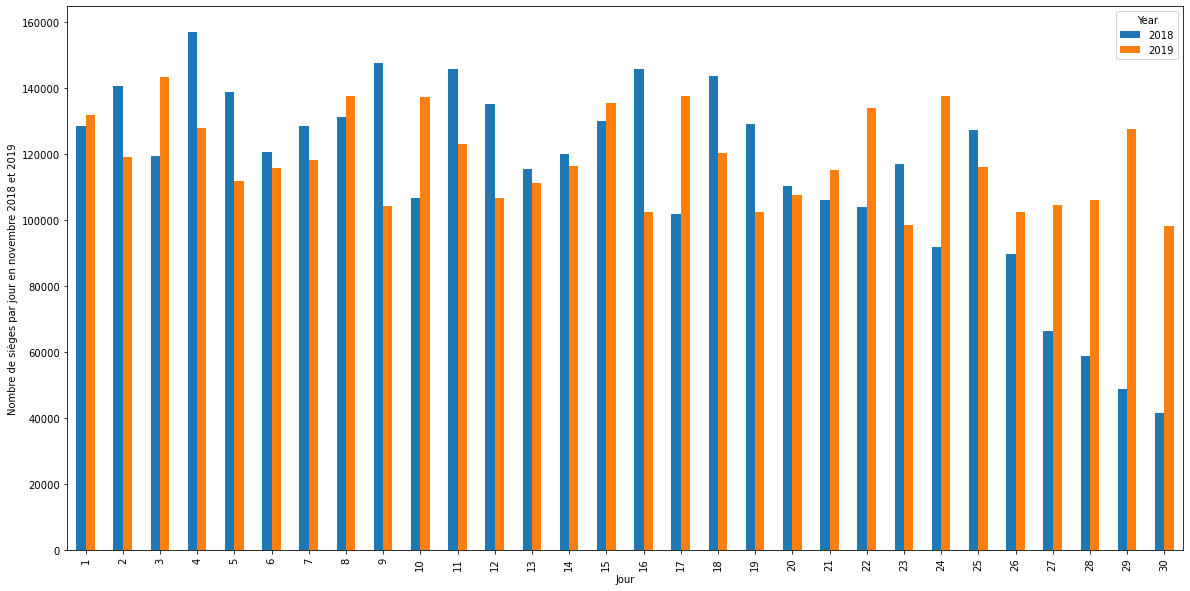

In [9]:
#Comparaison novembre 2018 et novembre 2019
df_air_traffic_en_nov = df_air_traffic_france[df_air_traffic_france['Year-Month'].isin(["2018-11", "2019-11"])]

df_sieges_jour_en_nov = df_air_traffic_en_nov.pivot_table(columns="Year", values="seats", index=["Day"], aggfunc='sum')
df_sieges_jour_en_nov.reset_index(inplace=True)
df_sieges_jour_en_nov['Day'] = df_sieges_jour_en_nov['Day'].astype(str)

df_sieges_jour_en_nov.plot(x="Day", y=[2018, 2019], kind="bar",figsize=(20,10))
plt.xlabel('Jour')
plt.ylabel("Nombre de sièges par jour en novembre 2018 et 2019")

plt.show()

#à partir du 27 novembre il y a une différence importante

In [14]:
#Pour voir si novembre et décembre se ressemblent et qu'on peut imputer comme ça : 

#Comparaison novembre 2019 et décembre 2019
df_air_traffic_nov_dec = df_air_traffic_france[df_air_traffic_france['Year-Month'].isin(["2019-11", "2019-12"])]

df_sieges_jour_nov_dec = df_air_traffic_nov_dec.pivot_table(columns='Year-Month', values="seats", index=["Day"], aggfunc='sum')
df_sieges_jour_nov_dec.reset_index(inplace=True)
df_sieges_jour_nov_dec['Day'] = df_sieges_jour_nov_dec['Day'].astype(str)

#df_sieges_jour_nov_dec.plot(x="Day", y=["2019-11", "2019-12"], kind="bar", figsize=(20,10), color=["lime", "violet"])
#plt.xlabel('Jour')
#plt.ylabel("Nombre de sièges par jour en novembre 2018 et 2019")

#plt.show()

### Des essais d'imputation pour Novembre et Décembre 2018 

#### 1ère idée : pour tous les jours où il manque des données, remplacer toutes les valeurs de 2018 par celles de 2019

In [10]:
df_air_traffic_imput = df_air_traffic_france.copy()

#### Novembre 2018 :

Du 27 au 30 novembre 2018, on met les observations de 2019 à la place de celles existantes.

In [11]:
#On supprime les anciennes valeurs
dates_modif = pd.date_range('2018-11-27', '2018-11-30')
index_a_supprimer = df_air_traffic_france[df_air_traffic_france["sheduled_time_start"].isin(dates_modif)].index.tolist()
df_air_traffic_imput.drop(index=index_a_supprimer, axis=0, inplace=True)

#On fait la base des valeurs à mettre à la place
dates_imput = pd.date_range('2019-11-27', '2019-11-30')
df_imput_obs_2019 = df_air_traffic_france[df_air_traffic_france["sheduled_time_start"].isin(dates_imput)]
df_imput_obs_2019["Year"]=2018
df_imput_obs_2019["sheduled_time_start"] = pd.to_datetime(df_imput_obs_2019[['Year', 'Month', 'Day']])
df_imput_obs_2019['Year-Month'] = df_imput_obs_2019['sheduled_time_start'].dt.strftime('%Y-%m')

#On concatène
df_air_traffic_imput = pd.concat([df_air_traffic_imput, df_imput_obs_2019])
df_air_traffic_imput.sort_values(by=['sheduled_time_start'], inplace=True)

C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/2747778951.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_obs_2019["Year"]=2018
C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/2747778951.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_obs_2019["sheduled_time_start"] = pd.to_datetime(df_imput_obs_2019[['Year', 'Month', 'Day']])
C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/2747778951.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

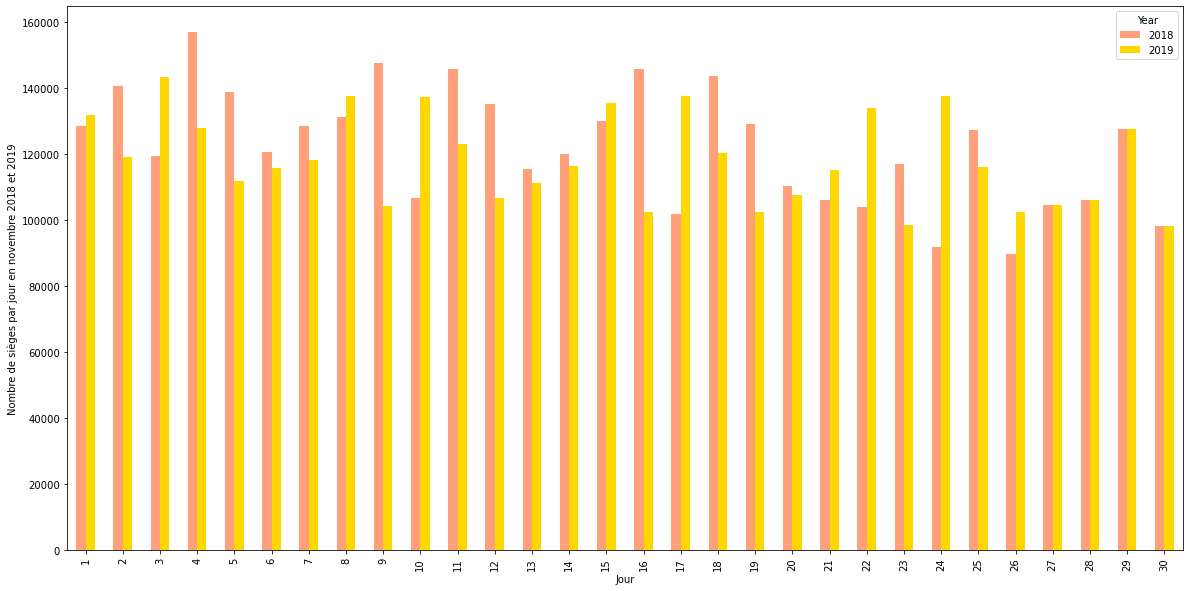

In [17]:
#Vérif que ça a marché :

df_air_traffic_en_nov = df_air_traffic_imput[df_air_traffic_imput['Year-Month'].isin(["2018-11", "2019-11"])]

df_sieges_jour_en_nov = df_air_traffic_en_nov.pivot_table(columns="Year", values="seats", index=["Day"], aggfunc='sum')
df_sieges_jour_en_nov.reset_index(inplace=True)
df_sieges_jour_en_nov['Day'] = df_sieges_jour_en_nov['Day'].astype(str)

df_sieges_jour_en_nov.plot(x="Day", y=[2018, 2019], kind="bar",figsize=(20,10), color=['lightsalmon', 'gold'])
plt.xlabel('Jour')
plt.ylabel("Nombre de sièges par jour en novembre 2018 et 2019")

plt.show()

#### Décembre 2018 :

Du 1 au 15 décembre 2018, on met les observations de 2019 à la place de celles existantes.

In [12]:
#On supprime les anciennes valeurs
dates_modif2 = pd.date_range('2018-12-1', '2018-12-15')
index_a_supprimer2 = df_air_traffic_france[df_air_traffic_france["sheduled_time_start"].isin(dates_modif2)].index.tolist()
df_air_traffic_imput.drop(index=index_a_supprimer2, axis=0, inplace=True)

#On fait la base des valeurs à mettre à la place
dates_imput2 = pd.date_range('2019-12-1', '2019-12-15')
df2_imput_obs_2019 = df_air_traffic_france[df_air_traffic_france["sheduled_time_start"].isin(dates_imput2)]
df2_imput_obs_2019["Year"]=2018
df2_imput_obs_2019["sheduled_time_start"] = pd.to_datetime(df2_imput_obs_2019[['Year', 'Month', 'Day']])
df2_imput_obs_2019['Year-Month'] = df2_imput_obs_2019['sheduled_time_start'].dt.strftime('%Y-%m')

#On concatène
df_air_traffic_imput = pd.concat([df_air_traffic_imput, df2_imput_obs_2019])
df_air_traffic_imput.sort_values(by=['sheduled_time_start'], inplace=True)

C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/4036887885.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_imput_obs_2019["Year"]=2018
C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/4036887885.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_imput_obs_2019["sheduled_time_start"] = pd.to_datetime(df2_imput_obs_2019[['Year', 'Month', 'Day']])
C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/4036887885.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

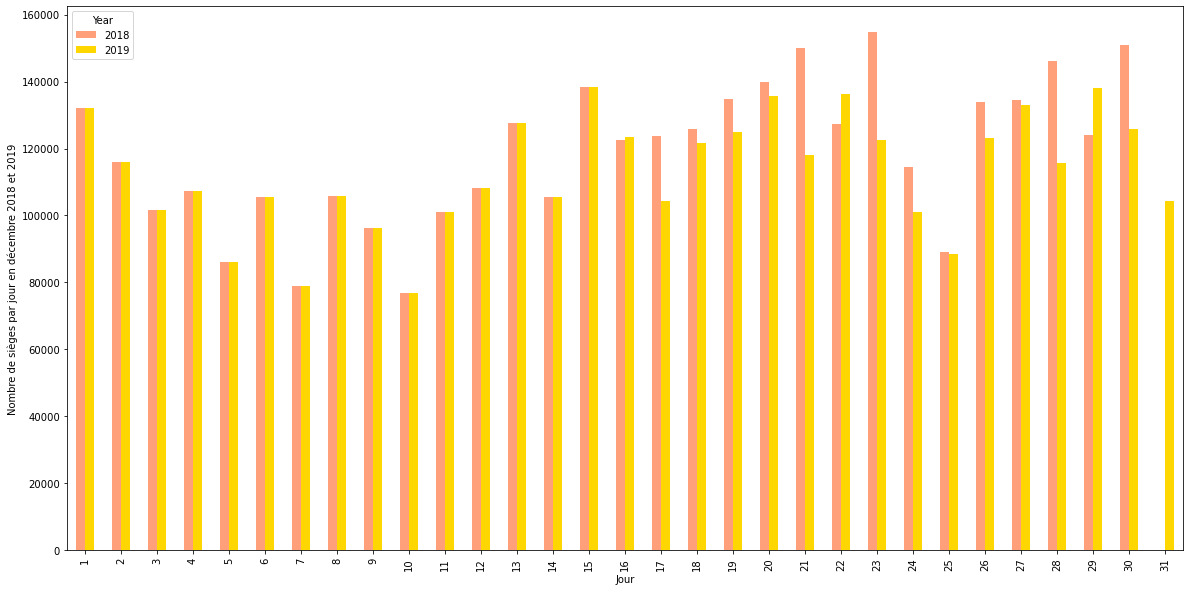

In [19]:
#Vérif que ça a marché

df_air_traffic_en_dec = df_air_traffic_imput[df_air_traffic_imput['Year-Month'].isin(["2018-12", "2019-12"])]

df_sieges_jour_en_dec = df_air_traffic_en_dec.pivot_table(columns="Year", values="seats", index=["Day"], aggfunc='sum')
df_sieges_jour_en_dec.reset_index(inplace=True)
df_sieges_jour_en_dec['Day'] = df_sieges_jour_en_dec['Day'].astype(str)

df_sieges_jour_en_dec.plot(x="Day", y=[2018, 2019], kind="bar",figsize=(20,10), color = ['lightsalmon', 'gold'])
plt.xlabel('Jour')
plt.ylabel("Nombre de sièges par jour en décembre 2018 et 2019")

plt.show()

In [25]:
#la base avec les imputations de nov-déc 2018
df_air_traffic_imput

,country_origin,citydest,sheduled_time_start,seats,number_planes,Year,Month,Day,Year-Month
0,Brazil,Paris,2017-05-16,451.0,1,2017,5,16,2017-05
5,United States-TX,Paris,2017-05-16,400.0,1,2017,5,16,2017-05
2,Portugal,Paris,2017-05-16,134.0,1,2017,5,16,2017-05
3,Russia,Paris,2017-05-16,268.0,2,2017,5,16,2017-05
4,United States-CA,Paris,2017-05-16,400.0,1,2017,5,16,2017-05
...,...,...,...,...,...,...,...,...,...
265690,Belgium,Nice,2021-12-07,164.0,1,2021,12,7,2021-12
265680,France,Lille,2021-12-07,134.0,1,2021,12,7,2021-12
265668,Germany,Paris,2021-12-07,1314.0,9,2021,12,7,2021-12
265666,Portugal,Paris,2021-12-07,183.0,2,2021,12,7,2021-12


Text(0, 0.5, 'Number of planes')

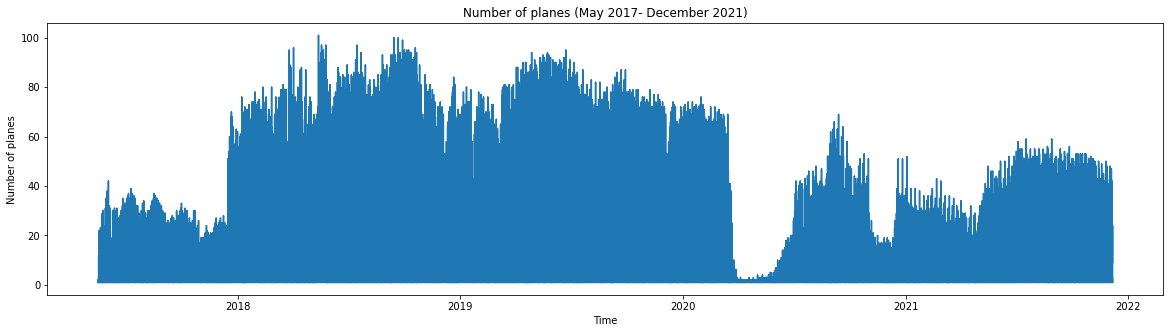

In [13]:
#on visualise le nombre d'avions de 2017 à 2021

x = df_air_traffic_imput["sheduled_time_start"]
y = df_air_traffic_imput["number_planes"]
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y)
plt.title('Number of planes (May 2017- December 2021)')
plt.xlabel('Time')
plt.ylabel('Number of planes')

Text(0, 0.5, "Nombre d'avions")

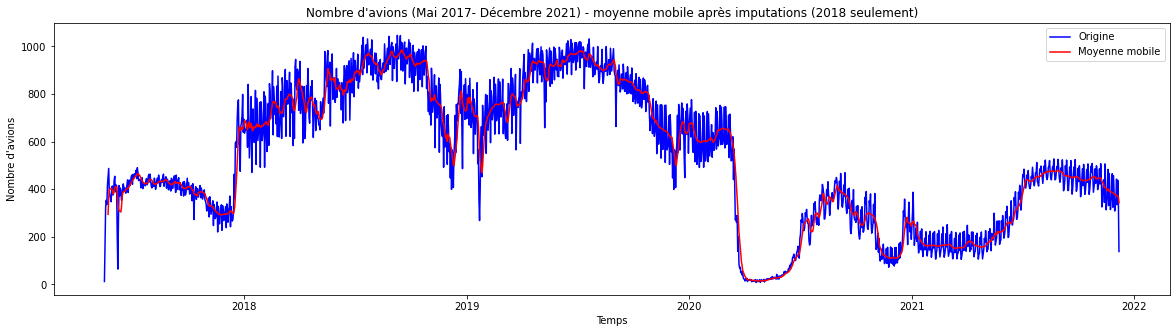

In [31]:
#on regarde la série temporelle et la moyenne mobile du nombre d'avions

df_air_traffic_imput_date = df_air_traffic_imput.groupby('sheduled_time_start').agg({'seats':'sum','number_planes':'sum'})
df_air_traffic_imput_avions = df_air_traffic_imput_date['number_planes']
df_air_traffic_imput_date.reset_index(inplace=True)

x = df_air_traffic_imput_date["sheduled_time_start"]
y = df_air_traffic_imput_date["number_planes"]
z = rolling_mean = df_air_traffic_imput_avions.rolling(window = 7).mean()

fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y, color = 'blue', label = 'Origine')
plt.plot(x, z, color = 'red', label = 'Moyenne mobile')
plt.title("Nombre d'avions (Mai 2017- Décembre 2021) - moyenne mobile après imputations (2018 seulement)")
plt.legend(loc = 'best')
plt.xlabel('Temps')
plt.ylabel("Nombre d'avions")

### Le problème de 2017

Il y a un problème dans la collecte des données en 2017. Pour remédier à ce problème, on remplace les données de mai à décembre 2017 par les données correspondants aux mêmes mois de l'année 2018. (On suppose ici un phénomène de saisonnalité).

In [21]:
#on fait une copie de la base avec les imputations de 2018 et on impute 2017 sur cette base copiée (pour éviter les pbs si l'imputation n'est pas optimale)
df_air_traffic_imput2 = df_air_traffic_imput.copy()

In [22]:
#On supprime les anciennes valeurs
pb_2017 = pd.date_range('2017-05-16', '2017-12-31')
index_a_supprimer_2017 = df_air_traffic_imput2[df_air_traffic_imput2["sheduled_time_start"].isin(pb_2017)].index.tolist()
df_air_traffic_imput2.drop(index=index_a_supprimer_2017, axis=0, inplace=True)

In [23]:
#On fait la base des valeurs à mettre à la place
dates_imput_2017 = pd.date_range('2018-05-16', '2018-12-31')
df_imput_obs_2017 = df_air_traffic_imput2[df_air_traffic_imput2["sheduled_time_start"].isin(dates_imput_2017)]
df_imput_obs_2017["Year"]=2017
df_imput_obs_2017["sheduled_time_start"] = pd.to_datetime(df_imput_obs_2017[['Year', 'Month', 'Day']])
df_imput_obs_2017['Year-Month'] = df_imput_obs_2017['sheduled_time_start'].dt.strftime('%Y-%m')

#On concatène
df_air_traffic_imput2 = pd.concat([df_air_traffic_imput2, df_imput_obs_2017])
df_air_traffic_imput2.sort_values(by=['sheduled_time_start'], inplace=True)

C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/4207640472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_obs_2017["Year"]=2017
C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/4207640472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_obs_2017["sheduled_time_start"] = pd.to_datetime(df_imput_obs_2017[['Year', 'Month', 'Day']])
C:\Users\Clemence\AppData\Local\Temp/ipykernel_60832/4207640472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [24]:
#la base avec les imputations de nov-déc 2018 et les imputations de 2017
df_air_traffic_imput2

,country_origin,citydest,sheduled_time_start,seats,number_planes,Year,Month,Day,Year-Month
64344,Ireland,Paris,2017-05-16,818.0,5,2017,5,16,2017-05
64478,Reunion,Paris,2017-05-16,1751.0,4,2017,5,16,2017-05
64479,Portugal,Nice,2017-05-16,114.0,1,2017,5,16,2017-05
64480,France,Clermont-Ferrand,2017-05-16,100.0,1,2017,5,16,2017-05
64481,United Kingdom,Carcassonne,2017-05-16,189.0,1,2017,5,16,2017-05
...,...,...,...,...,...,...,...,...,...
265659,France,Toulouse,2021-12-07,1481.0,9,2021,12,7,2021-12
265644,Portugal,Basel,2021-12-07,164.0,1,2021,12,7,2021-12
265662,United Arab Emirates,Paris,2021-12-07,1706.0,2,2021,12,7,2021-12
265664,Denmark,Paris,2021-12-07,234.0,1,2021,12,7,2021-12


Text(0, 0.5, "Nombre d'avions")

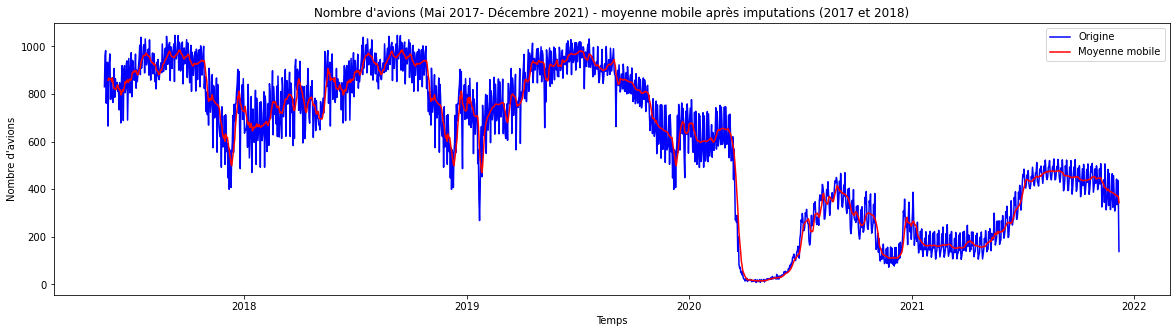

In [27]:
#on regarde la série temporelle et la moyenne mobile du nombre d'avions après cette nouvelle imputation

df_air_traffic_imput2_date = df_air_traffic_imput2.groupby('sheduled_time_start').agg({'seats':'sum','number_planes':'sum'})
df_air_traffic_imput2_avions = df_air_traffic_imput2_date['number_planes']
df_air_traffic_imput2_date.reset_index(inplace=True)

x = df_air_traffic_imput2_date["sheduled_time_start"]
y = df_air_traffic_imput2_date["number_planes"]
z = rolling_mean = df_air_traffic_imput2_avions.rolling(window = 7).mean()

fig = plt.figure(1, figsize=(20, 5))
plt.plot(x,y, color = 'blue', label = 'Origine')
plt.plot(x, z, color = 'red', label = 'Moyenne mobile')
plt.title("Nombre d'avions (Mai 2017- Décembre 2021) - moyenne mobile après imputations (2017 et 2018)")
plt.legend(loc = 'best')
plt.xlabel('Temps')
plt.ylabel("Nombre d'avions")